In [2]:
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

### Necesitamos agregar el canal para que tenga las dimensiones correctas.
 El canal = 1 porque las imagenees estan en escala de grisis

In [5]:
x_test = x_test.reshape(-1,28,28,1) #canal=1 for grey scale
x_train = x_train.reshape(-1,28,28,1) #canal=1 for grey scale

In [6]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [7]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation ='relu'))
model.add(Dense(32, activation = "relu")) 
model.add(Dense(num_classes, activation = 'sigmoid'))

model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
model.fit(x_train, y_train, batch_size = 64, epochs = 10, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 419s 7ms/step - loss: 0.0287 - accuracy: 0.9900 - val_loss: 0.0090 - val_accuracy: 0.9971
Epoch 2/10
60000/60000 [==============================] - 439s 7ms/step - loss: 0.0081 - accuracy: 0.9973 - val_loss: 0.0071 - val_accuracy: 0.9976
Epoch 3/10
60000/60000 [==============================] - 468s 8ms/step - loss: 0.0052 - accuracy: 0.9983 - val_loss: 0.0069 - val_accuracy: 0.9979
Epoch 4/10
60000/60000 [==============================] - 530s 9ms/step - loss: 0.0036 - accuracy: 0.9988 - val_loss: 0.0060 - val_accuracy: 0.9981
Epoch 5/10
60000/60000 [==============================] - 395s 7ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.0078 - val_accuracy: 0.9980
Epoch 6/10
60000/60000 [==============================] - 433s 7ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0065 - val_accuracy: 0.9981
Epoch 7/10
60000/60000 [==============================] - 424s

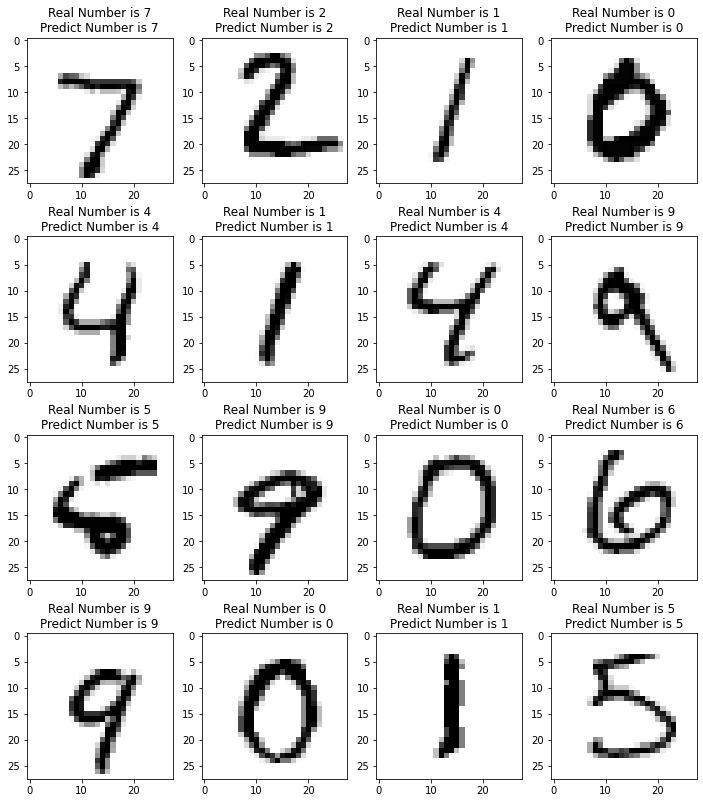

In [12]:
y_pred = model.predict(x_test)
x_test_v = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_test_v[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

In [18]:
scores = model.evaluate(x_test, y_test, verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 99.78%
